In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('C:\\Users\\aashi\\Desktop\\train.csv')

In [3]:
df.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478741 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  478741 non-null  int64 
 1   Police_Force                                 478741 non-null  int64 
 2   Number_of_Vehicles                           478741 non-null  int64 
 3   Number_of_Casualties                         478741 non-null  int64 
 4   Date                                         478741 non-null  object
 5   Day_of_Week                                  478741 non-null  int64 
 6   Time                                         478727 non-null  object
 7   Local_Authority_(District)                   478741 non-null  int64 
 8   Local_Authority_(Highway)                    478741 non-null  object
 9   1st_Road_Class                               478741 non-null  int64 
 

In [5]:
df.describe()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
count,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.0,478741.000000
mean,299892.954673,31.610178,1.745695,1.463528,4.367898,357.457132,4.381542,946.663375,37.035976,2.430068,0.0,1.402050
std,173261.274950,24.941660,0.626458,0.816019,1.872983,256.530105,1.369579,1730.926876,12.854299,3.268563,0.0,0.490313
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,0.0,1.000000
25%,149718.000000,12.000000,1.000000,1.000000,3.000000,103.000000,3.000000,10.000000,30.000000,-1.000000,0.0,1.000000
50%,299791.000000,33.000000,2.000000,1.000000,5.000000,314.000000,4.000000,336.000000,30.000000,3.000000,0.0,1.000000
75%,449990.000000,45.000000,2.000000,2.000000,6.000000,521.000000,6.000000,569.000000,40.000000,6.000000,0.0,2.000000
max,599999.000000,98.000000,4.000000,5.000000,7.000000,941.000000,6.000000,9832.000000,70.000000,6.000000,0.0,2.000000


In [6]:
df.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [7]:
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0], inplace=True)
df['Special_Conditions_at_Site'].fillna(df['Special_Conditions_at_Site'].mode()[0], inplace=True)
df['Time'].fillna(df['Time'].mode()[0], inplace=True)

In [8]:
df.drop(['2nd_Road_Class'],axis=1,inplace=True)
df.drop(['2nd_Road_Number'],axis=1,inplace=True)
df.drop(['1st_Road_Class'],axis=1,inplace=True)
df.drop(['1st_Road_Number'],axis=1,inplace=True)

In [9]:
df['Date'].value_counts()

23/02/12    5390
17/01/12    5226
19/01/12    5026
28/01/12    4681
24/02/12    4612
            ... 
28/10/12     129
10/06/12     125
16/09/12     122
05/08/12     122
13/08/12     120
Name: Date, Length: 366, dtype: int64

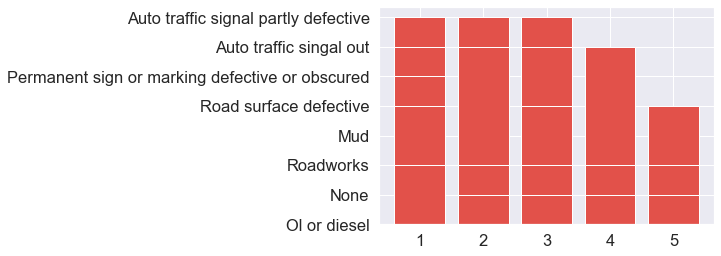

In [10]:
n= df['Number_of_Casualties'].head(10000)
p = df['Special_Conditions_at_Site'].head(10000)
 
# Figure Size
 
# Horizontal Bar Plot
plt.bar(n,p)
 
# Show Plot
plt.show()

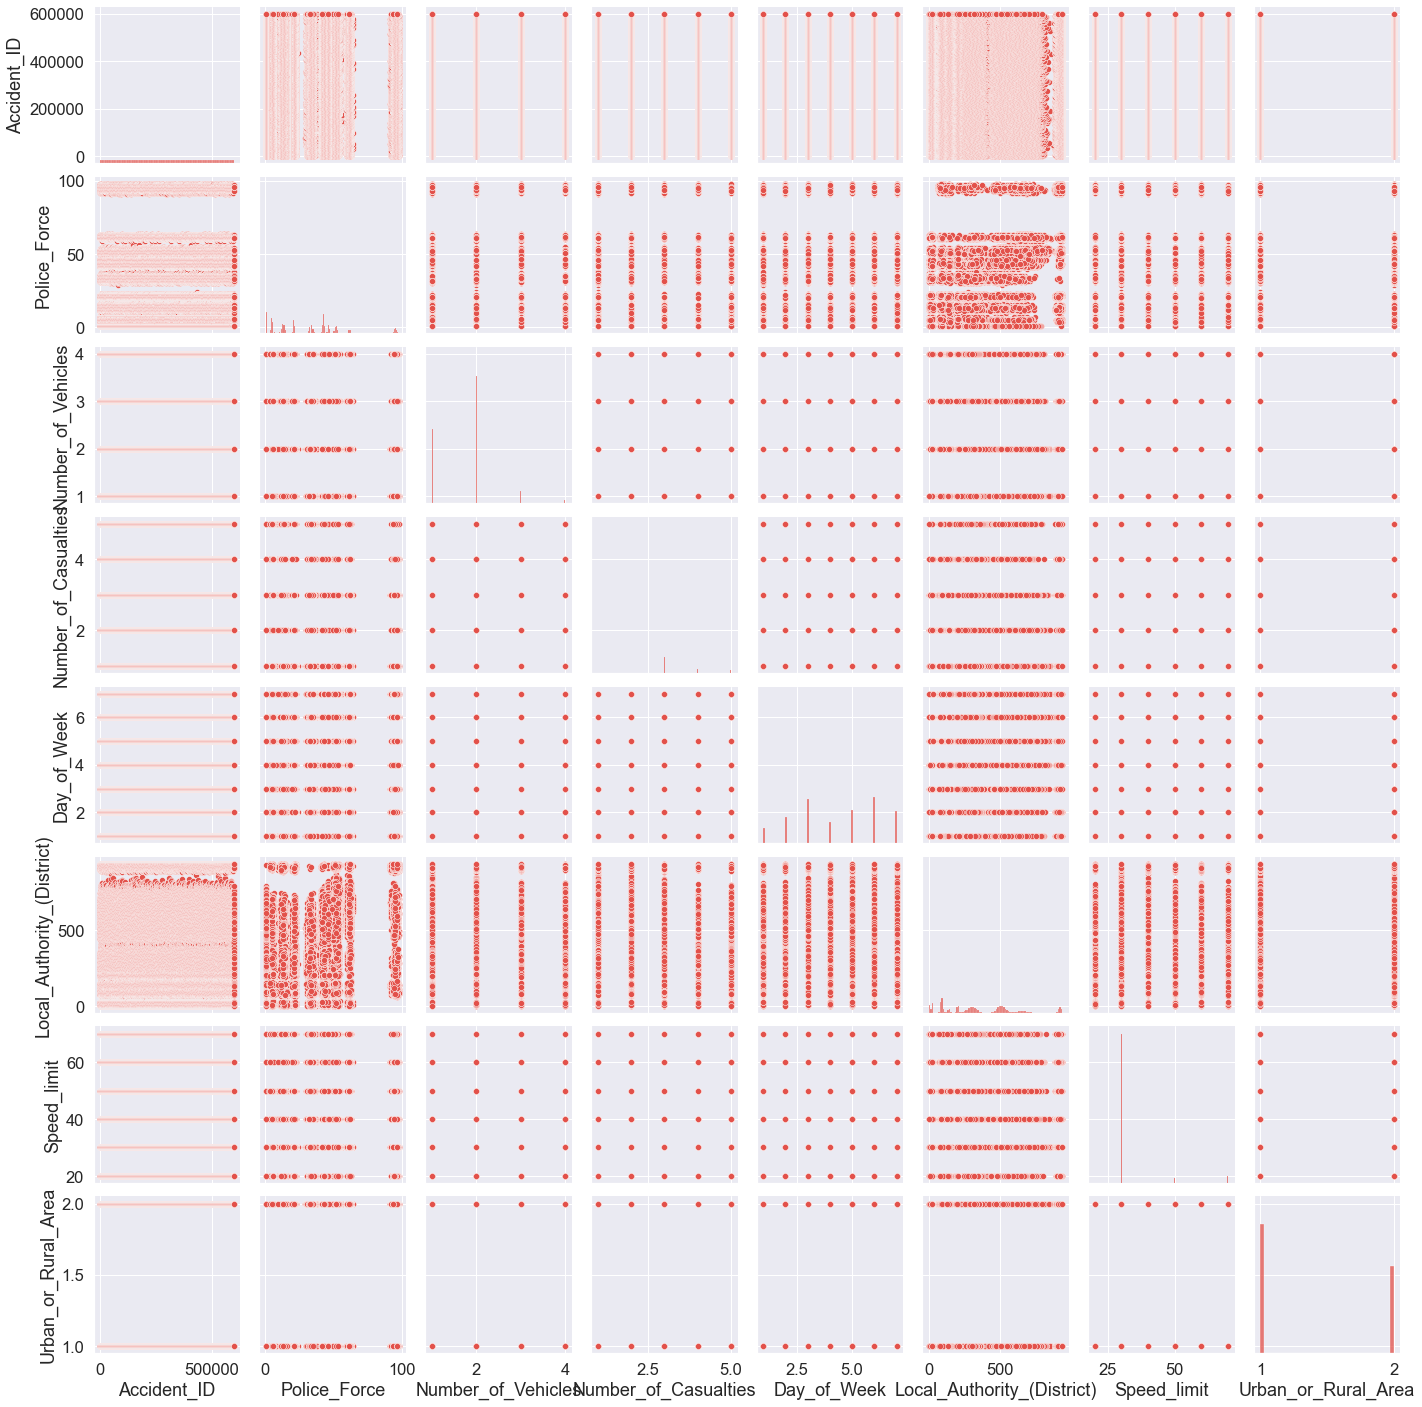

In [11]:
p = sns.pairplot(df)

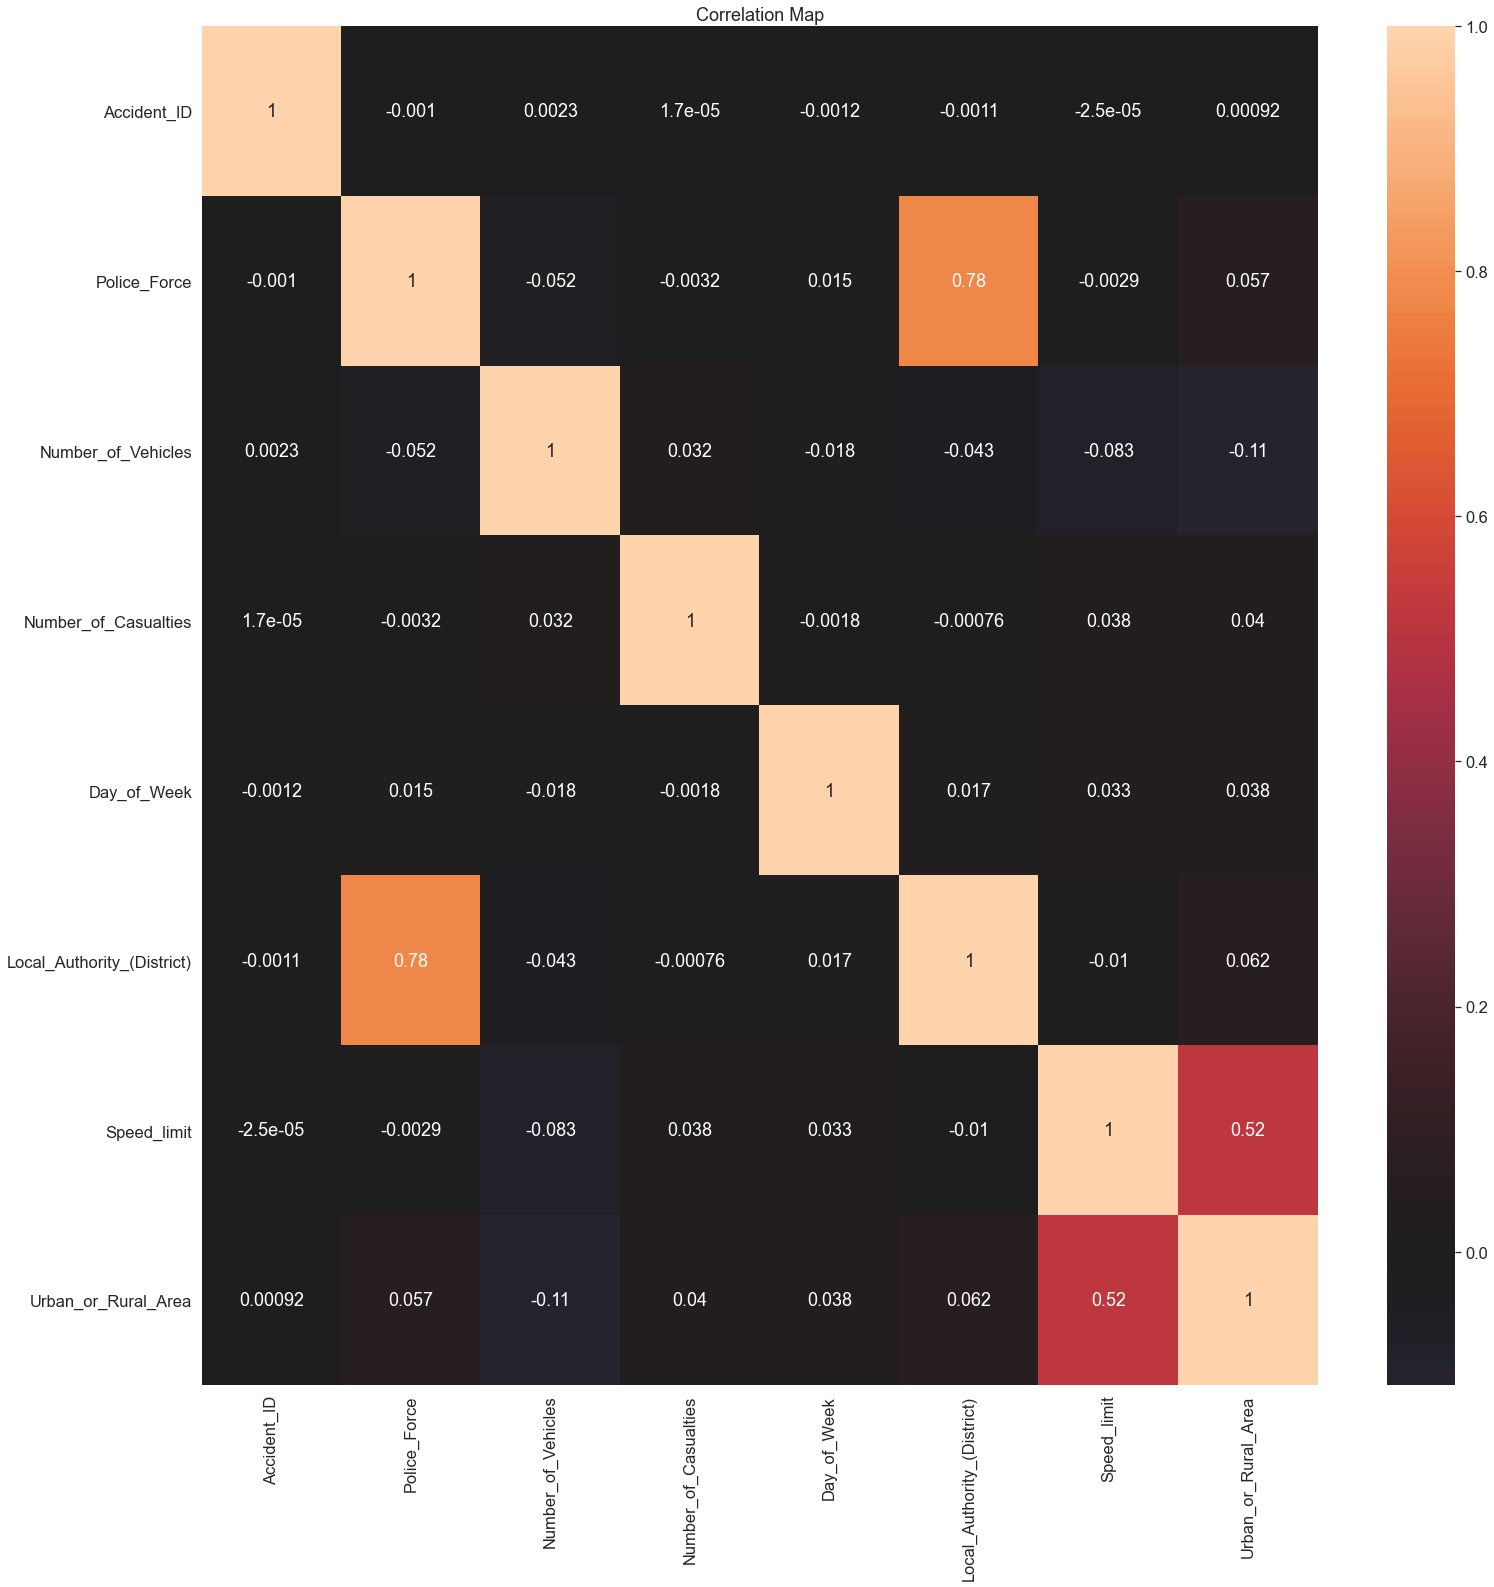

In [12]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [13]:
df.columns

Index(['Accident_ID', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Road_Type',
       'Speed_limit', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'state', 'postcode', 'country'],
      dtype='object')

In [14]:
df.dtypes

Accident_ID                                     int64
Police_Force                                    int64
Number_of_Vehicles                              int64
Number_of_Casualties                            int64
Date                                           object
Day_of_Week                                     int64
Time                                           object
Local_Authority_(District)                      int64
Local_Authority_(Highway)                      object
Road_Type                                      object
Speed_limit                                     int64
Pedestrian_Crossing-Human_Control              object
Pedestrian_Crossing-Physical_Facilities        object
Light_Conditions                               object
Weather_Conditions                             object
Road_Surface_Conditions                        object
Special_Conditions_at_Site                     object
Carriageway_Hazards                            object
Urban_or_Rural_Area         

In [31]:
#Plots
#num_atr --> Numerical attributes
#cat_atr --> Categorical attributes
num_atr=['Accident_ID','Police_Force','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Speed_limit','Urban_or_Rural_Area','Local_Authority_(District)']

cat_atr=['Date','Time','Road_Type','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards','state','postcode','Local_Authority_(Highway)','country','Did_Police_Officer_Attend_Scene_of_Accident','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities']

In [16]:
len(cat_atr)

15

In [17]:
len(num_atr)

12

In [18]:
df.shape

(478741, 23)

In [19]:
# Fitting the linear model
x = df.drop(["Number_of_Casualties"],axis=1)
y = df['Number_of_Casualties']

In [35]:
#perform standardization on categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_atr] = df[cat_atr].apply(le.fit_transform)

In [43]:
import statsmodels.api as sm

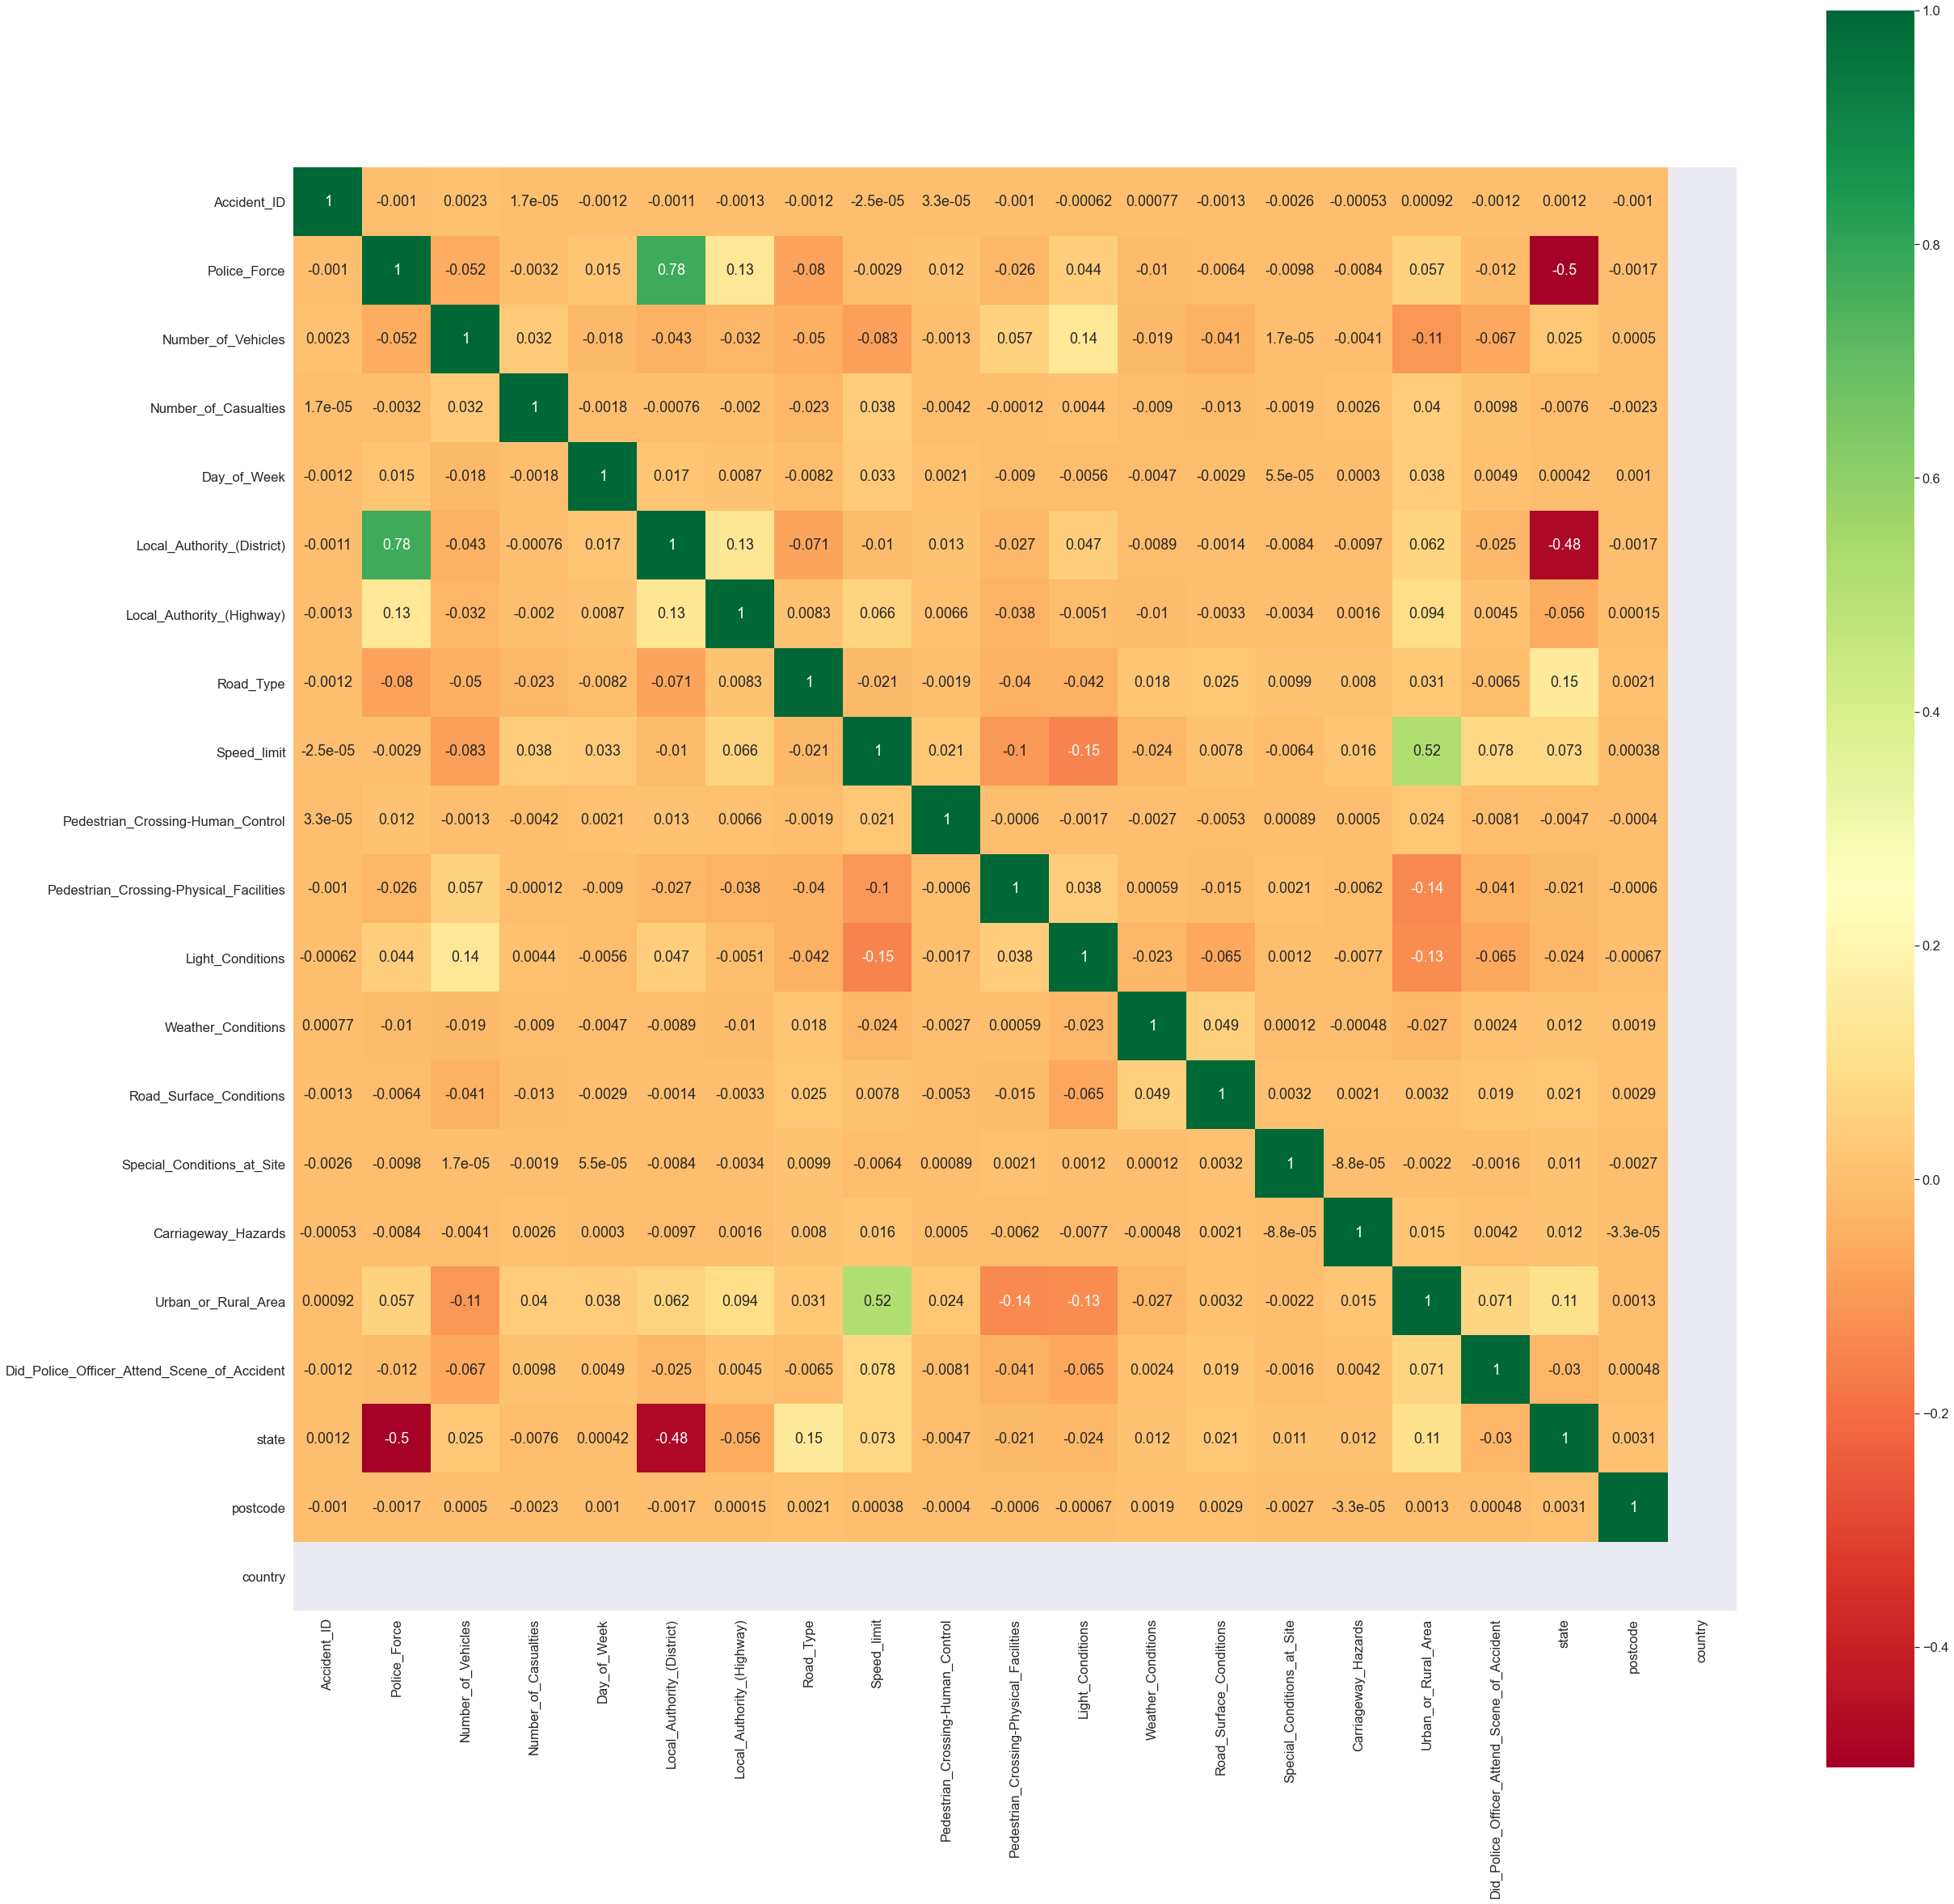

In [34]:
plt.figure(figsize=(40,40))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap